Goal of this program is to run elements of DORA in a way where we can troubleshoot the internal coding pathways

In [1]:
import sys


### Please append the SMA folder that contains DORA 
sys.path.append(r'C:\Users\jerry\Desktop\Research\Kosuri\Coding\OMMxDORA-tomerge\sma') #if you are not amanda, change to your sma file path (found in zipfile downloaded from github)


import DORA
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import itertools

In [2]:
#UNIVERSAL PARAMETERS
#get the name of your folder as a string and put r in front 
folder_name = r"C:\Users\jerry\Desktop\Research\Kosuri\Coding\OMMxDORA-tomerge\test_set\Nan_test" #select folder
file_name = '00001.csv'  
pk = os.path.splitext(file_name)[0]
pixel_size = 117  # in nanometers
time_step = 100  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset #ARBITRARILY SET TO 0 AND -1
frame_end = -1  # enter -1 to end at the last value of the data set
cmap = "spring" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
exp_tag = "NaN_debug" # a tag that caries the name of the experiment
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 
save_plot = 'yes' 

exp_title = "_simplest_case"
analysisName='Null'

# file_name = csvnum   #Jerry Gets rid of old file title



#universal parameters
exp_tag = exp_title + pk # a tag that caries the name of the experiment


# pixel_size = 117  # in nanometers
time_step = 2  # miliseconds per frame in trajectory movie
# frame_start = 4000  # enter 0 to start from beginning of dataset
# frame_end = 4500 #
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = -1
# frame_start = 3500  # enter 0 to start from beginning of dataset
# frame_end = 4000
 # enter -1 to end at the last value of the data set
cmap = "spring_r" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 
save_plot = 'yes' 

#downsampling parameters
bin_size = 20  # bin size for downsample/filter processing
processing = "none"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
# plot_type = "grid"
plot_type = "2D"
#Graphing options:
    # Grid plot
        #grid: a grid of little snippets of the data

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find err angle
display_center = "no"

#Labels
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 7
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'no'

#########Angle Versus Time (AVT or avt) Graphs

#       Formatting parameters for 'radius filter plot'
rad_filter_type_lower = 'nm'  # enter 'zscore' or 'nm' for choice
rad_filter_type_upper = 'zscore'  # enter 'zscore' or 'nm' for choice
z_up = 3  # enter an upper bound for z score.
z_down = -3  # enter a lower bound for z score
dist_low = 30  # lower bound for ABS of Radius filter
dist_high = 70  # upper bound for ABS of Radius filter



#Formatting parameters 'grid' plot  ##################################FORMATTING SETTINGS FOR GRID
frames_per_plot = 500  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.Caldera parameters:
donut_width = 15

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= analysisName
name_saving_folder = "Data Tables"

### Navigate to the correct folder

In [3]:
#Change the folder directory to be the current folder's 
os.chdir(folder_name)

#Take all files in the current folder(the one we just switched to) and store it in a list through which we will iterate
my_files = os.listdir(os.getcwd())

# get current path
path_OG = os.getcwd()

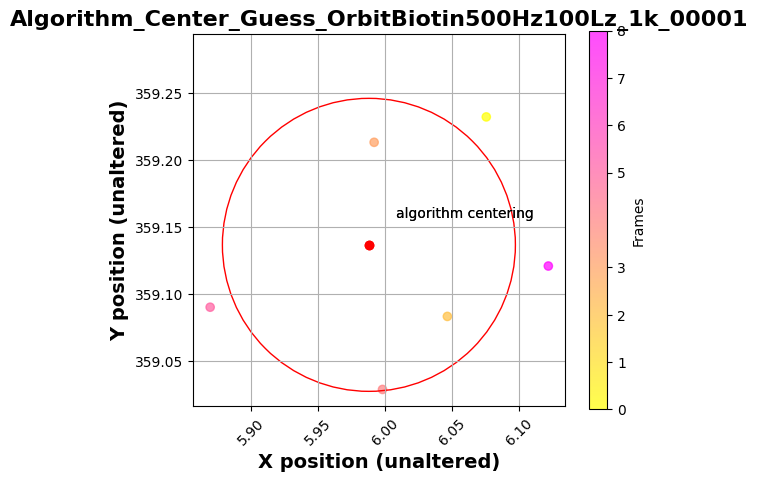

The center is (5.9877677646122445, 359.1365748959184)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


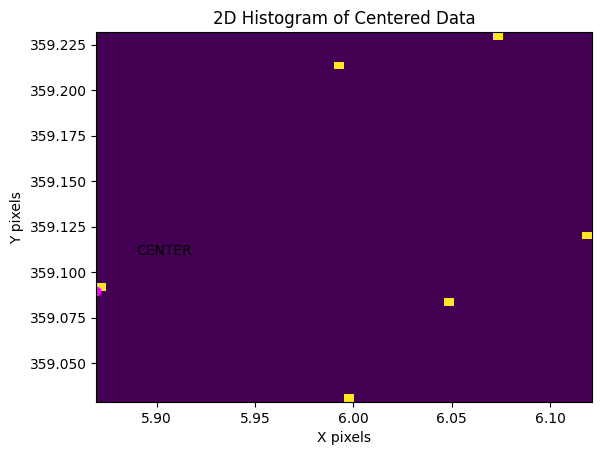

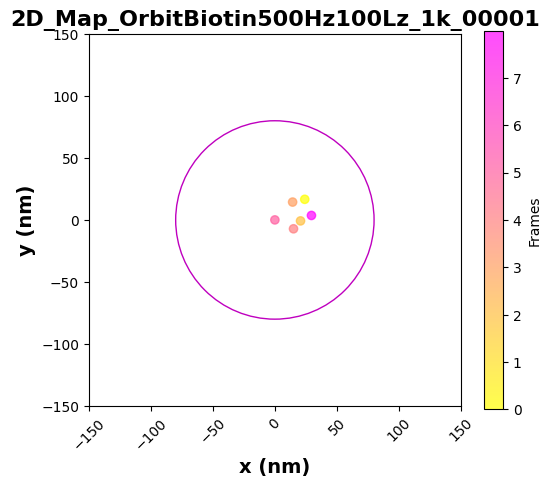

In [4]:
pk = os.path.splitext(file_name)[0]
exp_tag = "OrbitBiotin500Hz100Lz_1k" + "_" + pk
#run DORA.find_center
initial_parameters = [file_name, time_step, frame_start, frame_end, cmap, exp_tag, first_zero_end, graph_centers, save_plot]
center, data, ind_invalid_reading, data_back, my_rad_estimate = DORA.find_center(*initial_parameters)

#prompt user for estimated center
# NEW CENTERING ALGORITHM WITH LOW RES HIST

#section x and y data
x = data["X position"]
y = data["Y position"]

# select arbitrary bin value:
bin_num = 50

center_OR = DORA.find_center_hist_max(x, y, bin_num)


# run DORA.downsampling
downsample_parameters = [bin_size, processing, data, center_OR, time_step, pixel_size, frame_start, frame_end]
down_sampled_df = DORA.downsample(*downsample_parameters)

# run DORA.graph --> Grid graph

#intialize parameters for grid graph
#Trajectory map parameters:
tajectory_map_parameters = [file_name, down_sampled_df, plot_type, display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag]

if plot_type == "2D" or plot_type == "3D":
    DORA.graph(plot_type,*tajectory_map_parameters)

In [5]:
data

,index,X position,Y position,Intensity,X displacement (pixels),Y displacement (pixels),X displacement (nm),Y displacement (nm),Time (ms),Radius (nm),z-score Rad,Angle
0,0,6.075274,359.231934,1119,0.205839,0.142209,24.083126,16.638435,0,29.271735,0.991730,325.360365
2,2,6.046267,359.083221,1060,0.176831,-0.006503,20.689200,-0.760892,4,20.703187,0.126760,2.106232
3,3,5.991671,359.213013,1152,0.122235,0.123288,14.301530,14.424690,6,20.312692,0.087341,314.754353
4,4,5.997901,359.028778,1158,0.128465,-0.060947,15.030426,-7.130758,8,16.636148,-0.283795,25.380671
5,5,5.869436,359.090088,1266,0.000000,0.000363,0.000000,0.042489,10,0.042489,-1.958876,270.000000
8,8,6.121534,359.120789,1217,0.252099,0.031064,29.495532,3.634470,16,29.718610,1.036841,352.975364


### Save Data in mark down folder

In [10]:
#troubleshoot talbe function
# DELETE DORA.table with table()

# def table(*table_parameters):
    # Set up Block

# Accept my variables from graphing parameters
(down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
    rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size, data_back, save_table, file_name) = table_parameters

# import the 2 ways to analyze angular data: 1) Claire's way, 2) Jerry's Way [More Current]
import AngleCalc

# Gather inputs to Cacluate Angle under Jerry's Angle calculation paradigm
inputs_avt_filter = [down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
                        rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size]
# Call and Run Jerry's Angle Calculation
data, xy_goodbad, avt_good, avt_bad, data_fil_dsa, data_fil_down_bad, data_fil_up_bad = AngleCalc.avt_filter(
    *inputs_avt_filter)

print("Checkpoint 1 PASSED: imported function parameters")

Checkpoint 1 PASSED: imported function parameters


In [17]:


################################### [Final Data Table Assembly ] ######################################

# Organzize Data Table with Final Filtered Data [Re insert sus points from lower and upper bound filtering]
# slap all the bad data on the end of the good data
data_final = pd.concat([avt_good, avt_bad])
# sort by index so that values go back to where they are supposed to be:
data_final = data_final.sort_values(by=["index"])

# re insert sus points [re insert sus points from invalid]
# Organzize Data Table with Front End data (data) and back end data (data_back)
# slap all the bad data on the end of the good data
data_final_final = pd.concat([data_back, data_final])
# sort by index so that values go back to where they are supposed to be:
data_final_final = data_final_final.sort_values(by=["index"])

del data_final_final['X position']
del data_final_final['Y position']

print("CP1 :data_final_final initialized")
# Label of the Data with either Normal, Upper bound, Lower Bound, Invalid Reading

# Initialize the data table to be populated
data_final_final["Excluded Type"] = 'None'

# store this into a dummy vector
dummy_vec = data_final_final["Excluded Type"].copy()

# Set all indices of AVT_good to normal
# Select all indicies that are NORMAL --> avt_good indicies  #### THE ERROR WITH THE DORA.table is here 
ind_Normal = avt_good["index"].copy()
dummy_vec[ind_Normal] = 'Normal'

print("CP2 : error columns defined")

# Set all indicies of data_back to 'Invalid Reading' and put them in the dummy variable
ind_IR = data_back["index"].copy()
dummy_vec[ind_IR] = 'Invalid Reading'

# Find bad lower bounds and index for them and set value to "below bound"
ind_bad_down = data_fil_down_bad["index"].copy()
dummy_vec[ind_bad_down] = 'Below Bound'

# fFind bad upper bounds and index for them and set value to "upper bound"
ind_bad_up = data_fil_up_bad["index"].copy()
dummy_vec[ind_bad_up] = 'Above Bound'

print("CP2 : error columns defined")

data_final_final["Excluded Type"] = dummy_vec
data_final_final = data_final_final[[
    "index", "Time (ms)", "Angle", "Delta Angle", "Continuous Angle", "Excluded Type"]]

print("Checkpoint 2 passed: all data is processed")

if save_table == "yes":
    my_title = file_name + "_Final_DataTable.csv"
    data_final_final.to_csv(
        my_title, index="false")
    print("I have saved the table for " + file_name + " as " + my_title)

    # return data, avt_good, avt_bad, data_final_final

CP1 :data_final_final initialized


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [8]:
# Load table parameters
table_parameters = [down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
                    rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size, data_back,save_table,file_name]

# run DORA.table
DataTable, avt_good, avt_bad, data_final_final = table(*table_parameters)
DataTable


Checkpoint 1 PASSED: imported function parameters


InvalidIndexError: Reindexing only valid with uniquely valued Index objects